# Import Data

In [1]:
import pandas as pd

# import data.xlsx
data_path = "./data.xlsx"
xls = pd.ExcelFile(data_path)

f1m = pd.read_excel(xls, 'Follower_Mk1')
f2m = pd.read_excel(xls, 'Follower_Mk2')
f3m = pd.read_excel(xls, 'Follower_Mk3')

f1m.head()

,Date,Leader's Price,Follower's Price,Cost
0,1,1.721828,1.774033,1
1,2,1.779242,1.793029,1
2,3,1.787140,1.786484,1
3,4,1.773467,1.773290,1
4,5,1.746195,1.810835,1


# Define Given Functions

In [2]:
def demand(u_L, u_F):
    return 2 - u_L + (0.3 * u_F)

def daily_profit(u_L, u_F, cost):
    return (u_L - cost) * demand(u_L, u_F)

# Clean Data
Just removing any outliers defined by the 99th quantile.

In [3]:
q_1 = f1m["Follower\'s Price"].quantile(0.99)
f1m = f1m[f1m["Follower\'s Price"] < q_1]
q_2 = f2m["Follower\'s Price"].quantile(0.99)
f2m = f2m[f2m["Follower\'s Price"] < q_2]
q_3 = f3m["Follower\'s Price"].quantile(0.99)
f3m = f3m[f3m["Follower\'s Price"] < q_3]

# Visualisations

## Price Distributions


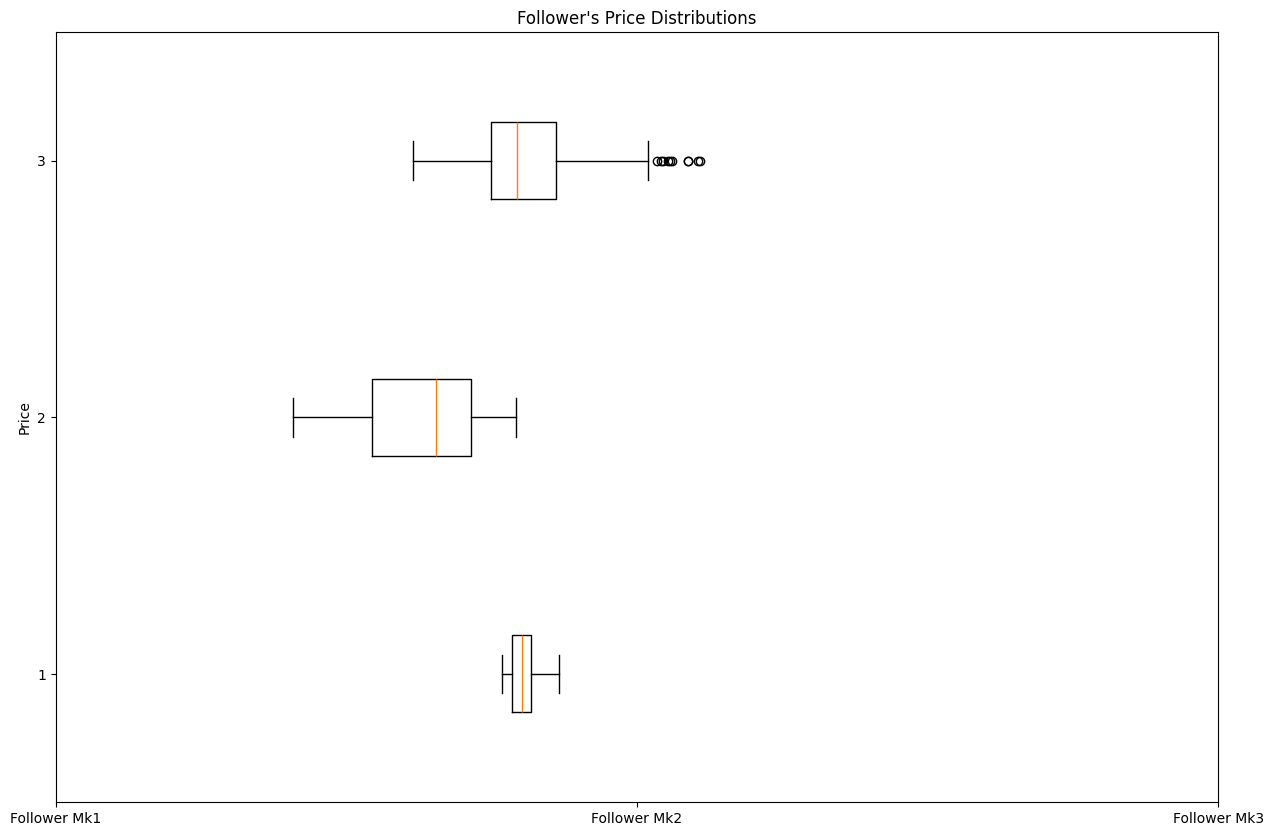

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

column = "Follower's Price"
data = [f1m[column], f2m[column], f3m[column]]

fig = plt.figure(figsize =(15, 10))
plt.boxplot(data, vert=0)

plt.title('Follower\'s Price Distributions')
plt.xticks([1, 2, 3], ['Follower Mk1', 'Follower Mk2', 'Follower Mk3'])
plt.ylabel('Price')

plt.show()
plt.savefig('follower_price_distributions.png')

## Followers Against Leader's Price

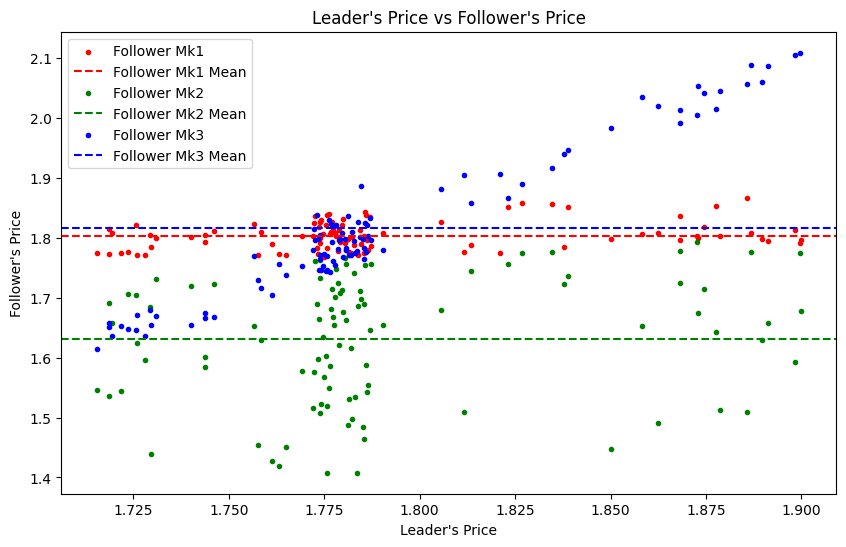

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(f1m['Leader\'s Price'], f1m['Follower\'s Price'], marker='.', color='r', label='Follower Mk1')
f1m_mean = f1m['Follower\'s Price'].mean()
plt.axhline(y=f1m_mean, color='r', linestyle='--', label='Follower Mk1 Mean')

plt.scatter(f2m['Leader\'s Price'], f2m['Follower\'s Price'], marker='.', color='g', label='Follower Mk2')
f2m_mean = f2m['Follower\'s Price'].mean()
plt.axhline(y=f2m_mean, color='g', linestyle='--', label='Follower Mk2 Mean')

plt.scatter(f3m['Leader\'s Price'], f3m['Follower\'s Price'], marker='.', color='b', label='Follower Mk3')
f3m_mean = f3m['Follower\'s Price'].mean()
plt.axhline(y=f3m_mean, color='b', linestyle='--', label='Follower Mk3 Mean')



plt.xlabel("Leader's Price")
plt.ylabel("Follower's Price")
plt.title("Leader's Price vs Follower's Price")
plt.legend()
plt.show()

## Follower's Price vs Leader's Price vs Time

In [9]:
%pip install plotly
import plotly.express as px

f1m['Follower Mk'] = 'Follower Mk1'
f2m['Follower Mk'] = 'Follower Mk2'
f3m['Follower Mk'] = 'Follower Mk3'

df = pd.concat([f1m, f2m, f3m])
df.head()

fig = px.scatter_3d(df, x="Leader's Price", y="Follower's Price", z="Date", color="Follower Mk", width=1000, height=800)
fig.show()


Note: you may need to restart the kernel to use updated packages.


## Follower Mk3 Price vs Leader's Price

<Figure size 640x480 with 0 Axes>

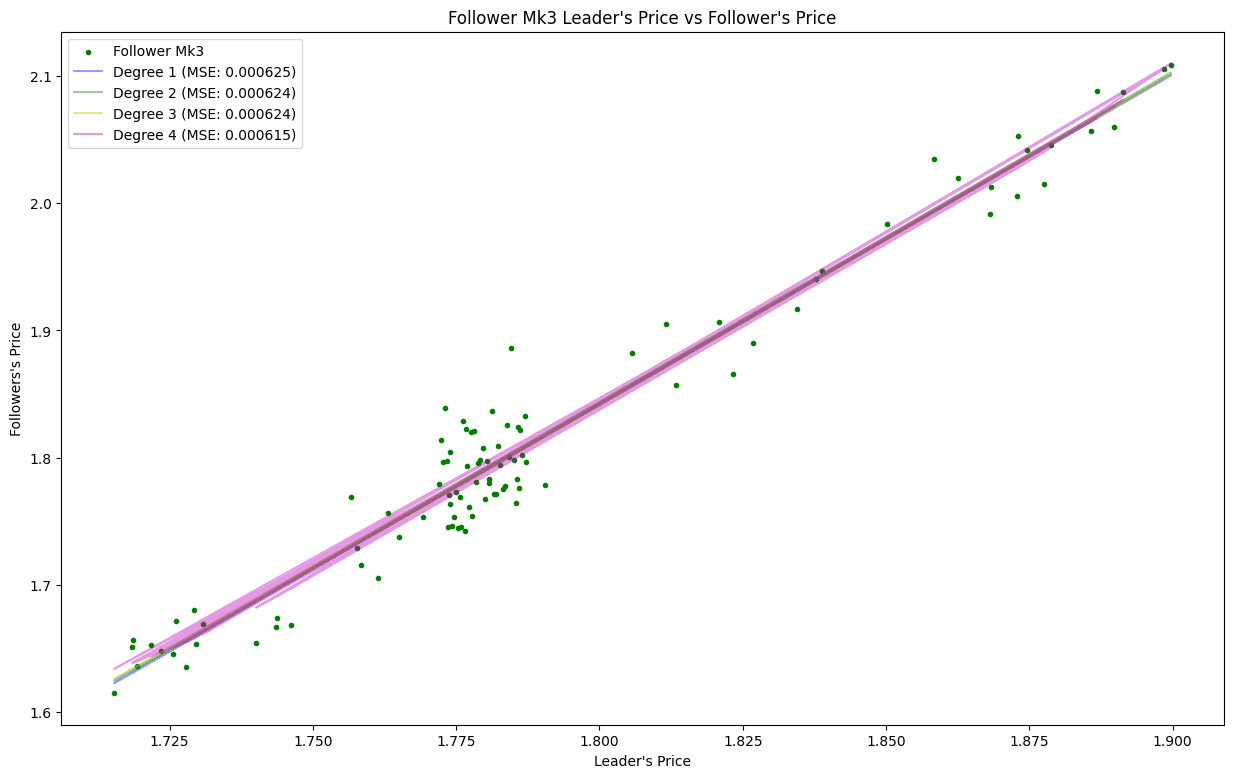

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np

plt.clf()
plt.figure(figsize=(15, 9))

x = f3m['Leader\'s Price']
y = f3m['Follower\'s Price']
plt.scatter(x, y, marker='.', color='g', label='Follower Mk3')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'm']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    y_fit = model(x)
    loss = np.mean((y - y_fit) ** 2) # Mean Squared Error
    plt.plot(x, y_fit, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.4)

plt.xlabel("Leader's Price")
plt.ylabel("Followers's Price")
plt.title("Follower Mk3 Leader's Price vs Follower's Price")
plt.legend()
plt.show()

# Follower Mk2 Price vs Time

<Figure size 640x480 with 0 Axes>

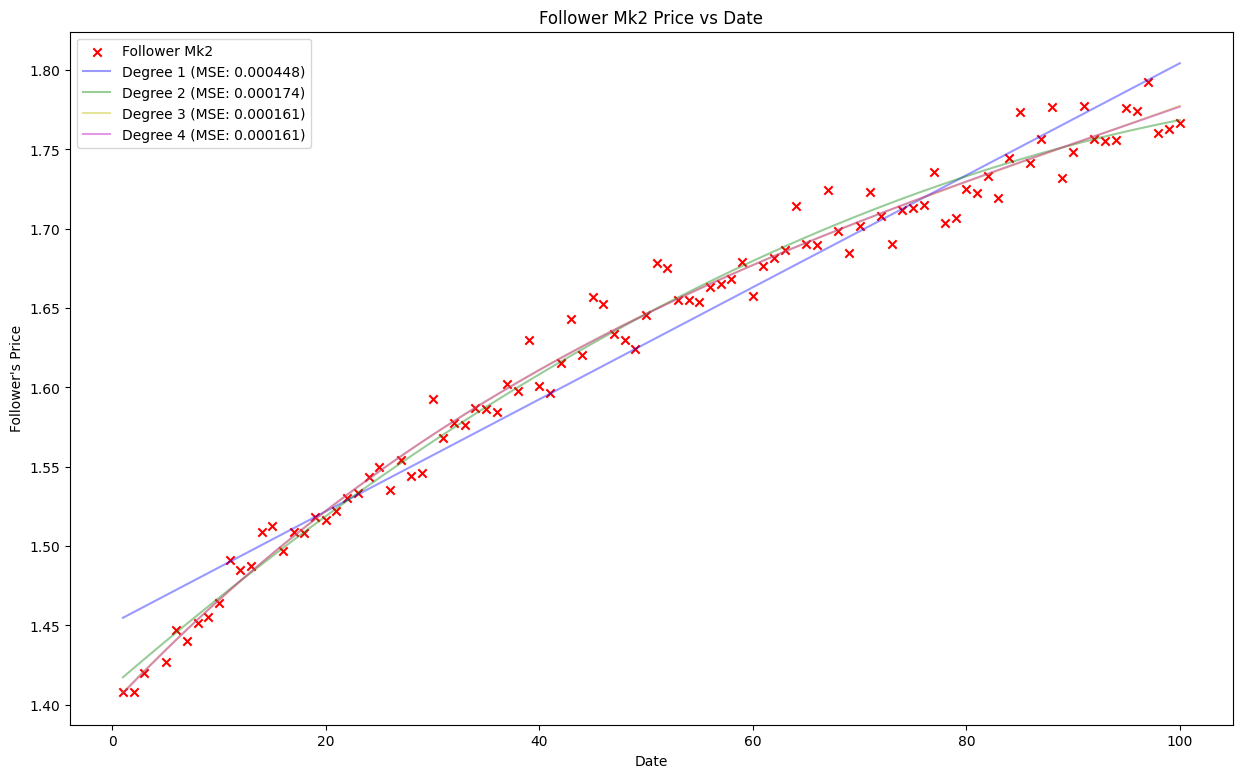

In [28]:
import numpy as np

plt.clf()
plt.figure(figsize=(15, 9))

x = f2m["Date"]
y = f2m["Follower's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk2')

degrees = [1, 2, 3, 4]
colours = ['b', 'g', 'y', 'm']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    y_fit = model(x)
    loss = np.mean((y - y_fit) ** 2) # Mean Squared Error
    plt.plot(x, y_fit, color=colour, label=f'Degree {degree} (MSE: {loss:.6f})', alpha=0.4)

plt.xlabel("Date")
plt.ylabel("Follower's Price")
plt.title("Follower Mk2 Price vs Date")
plt.legend()
plt.show()

## Followers vs Each Other

<Figure size 640x480 with 0 Axes>

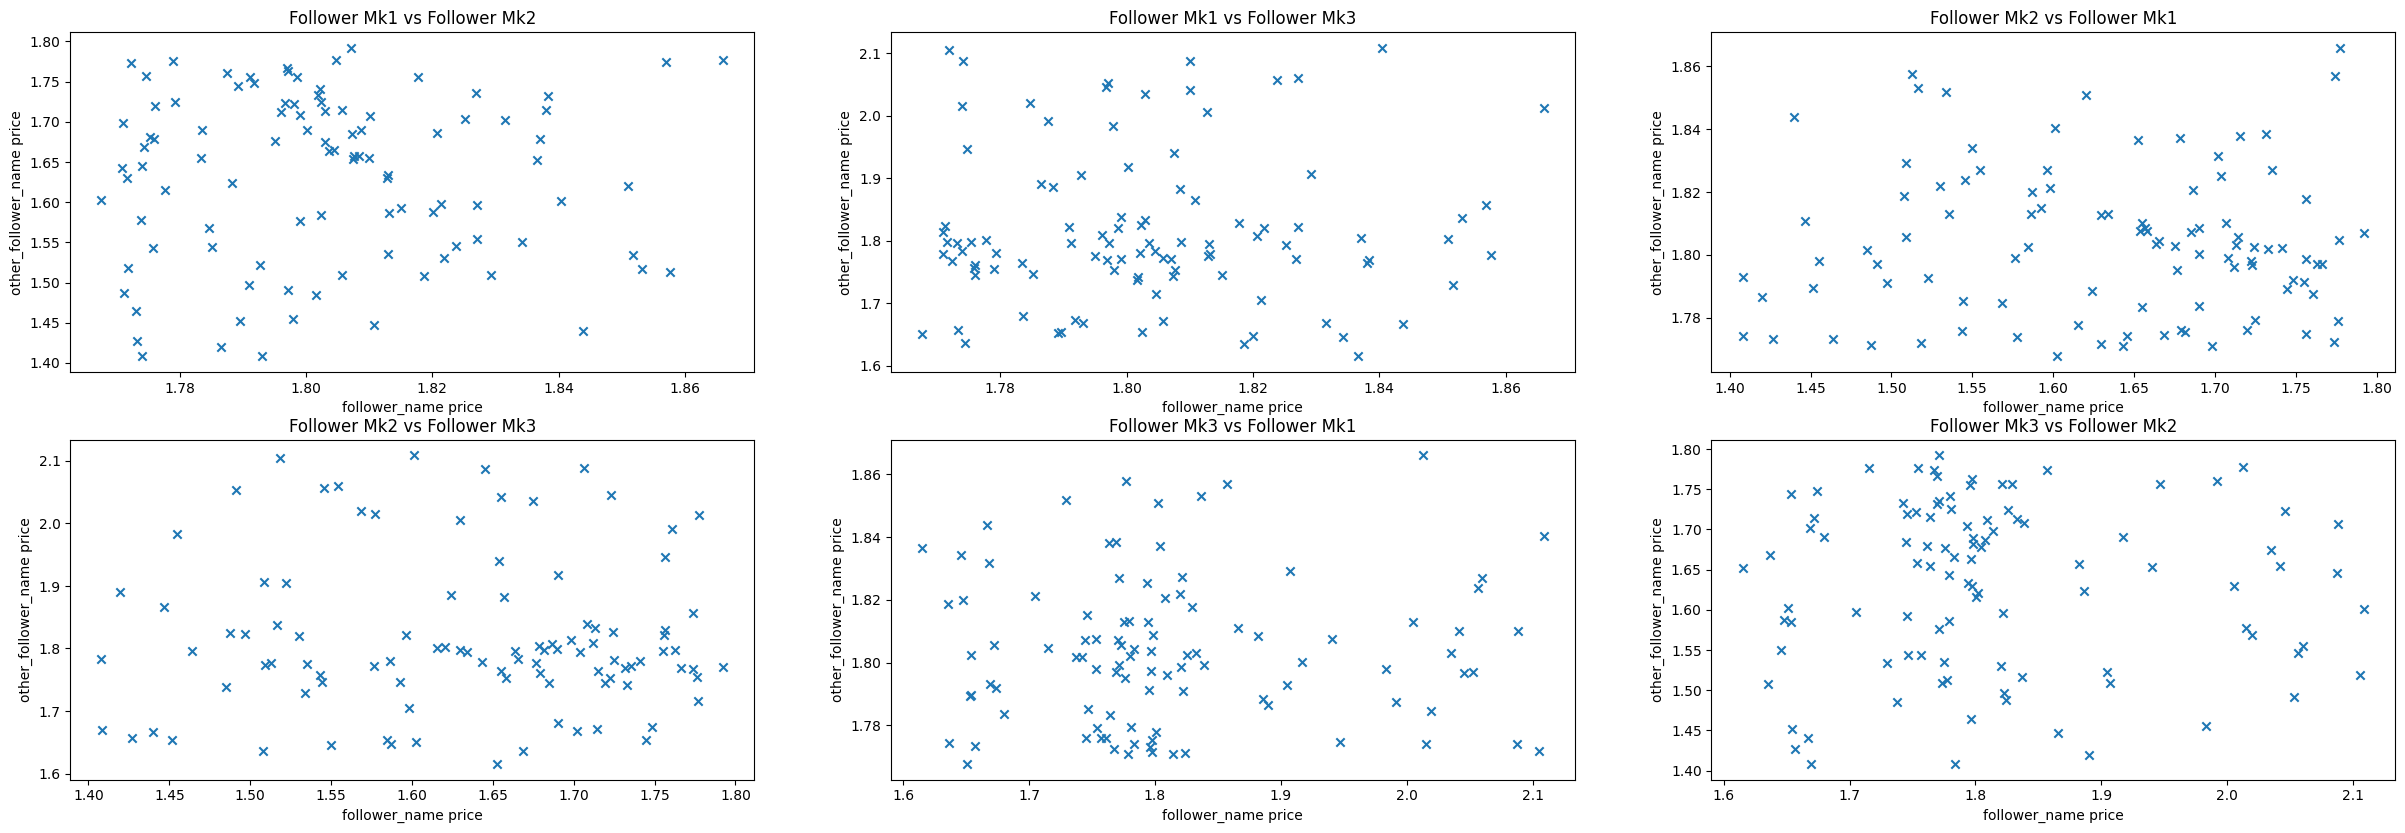

In [ ]:
# plot each follower's price against the every other follower's price
plt.clf()
plt.figure(figsize=(30, 15))


followers = [f1m, f2m, f3m]
follower_names = ['Follower Mk1', 'Follower Mk2', 'Follower Mk3']

plot_no = 1
for i, (follower, follower_name) in enumerate(zip(followers, follower_names)):
    for j, (other_follower, other_follower_name) in enumerate(zip(followers, follower_names)):
        if follower_name == other_follower_name:
            continue

        x = follower["Follower's Price"]
        y = other_follower["Follower's Price"]

        plt.subplot(3, 3, plot_no)
        plt.scatter(x, y, marker='x', label=f'{follower_name} vs {other_follower_name}')
        plt.xlabel(f'follower_name price')
        plt.ylabel(f'other_follower_name price')
        plt.title(f'{follower_name} vs {other_follower_name}')
        
        plot_no += 1


## Follower Mk1 Price Analysis

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\3952562296.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\3952562296.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\3952562296.py:12: RankWarning:

Polyfit may be poorly conditioned



<Figure size 640x480 with 0 Axes>

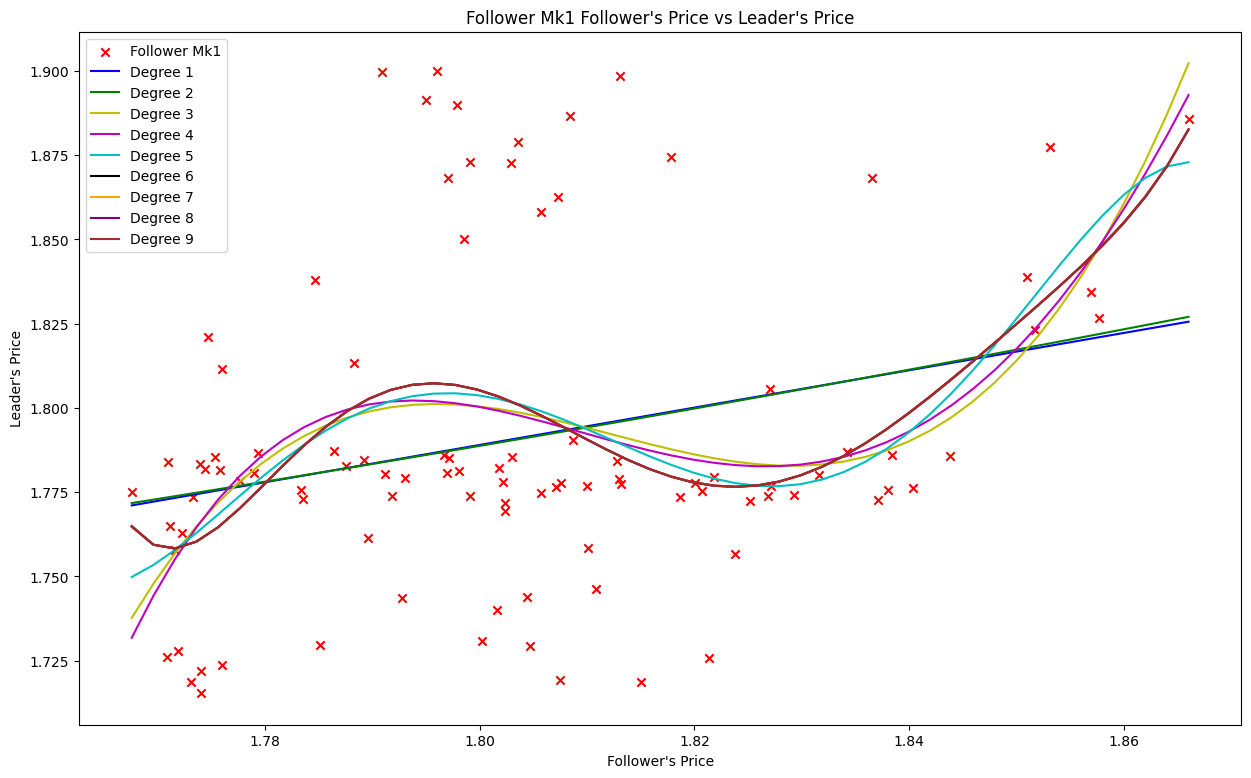

In [45]:
plt.clf()
plt.figure(figsize=(15, 9))

x = f1m["Follower's Price"]
y = f1m["Leader's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk1')

degrees = range(1, 10)
colours = ['b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    x_fit = np.linspace(x.min(), x.max(), num=50)
    y_fit = model(x_fit)
    plt.plot(x_fit, y_fit, color=colour, label=f'Degree {degree}')

plt.xlabel("Follower's Price")
plt.ylabel("Leader's Price")
plt.title("Follower Mk1 Follower's Price vs Leader's Price")
plt.legend()

plt.show()

<Figure size 640x480 with 0 Axes>

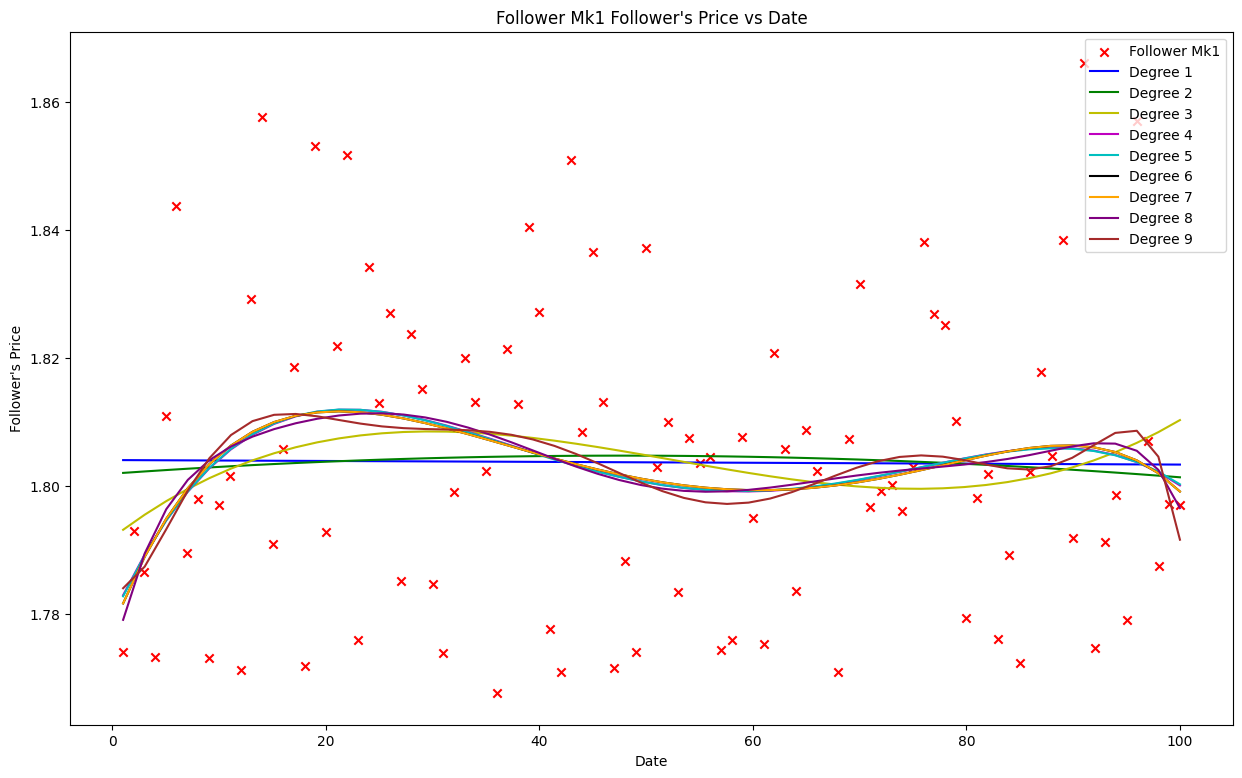

In [46]:
plt.clf()
plt.figure(figsize=(15, 9))

x = f1m["Date"]
y = f1m["Follower's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk1')

degrees = range(1, 10)
colours = ['b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    x_fit = np.linspace(x.min(), x.max(), num=50)
    y_fit = model(x_fit)
    plt.plot(x_fit, y_fit, color=colour, label=f'Degree {degree}')

plt.xlabel("Date")
plt.ylabel("Follower's Price")
plt.title("Follower Mk1 Follower's Price vs Date")
plt.legend()

plt.show()

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Jonah\AppData\Local\Temp\ipykernel_33668\801496475.py:12: RankW

<Figure size 640x480 with 0 Axes>

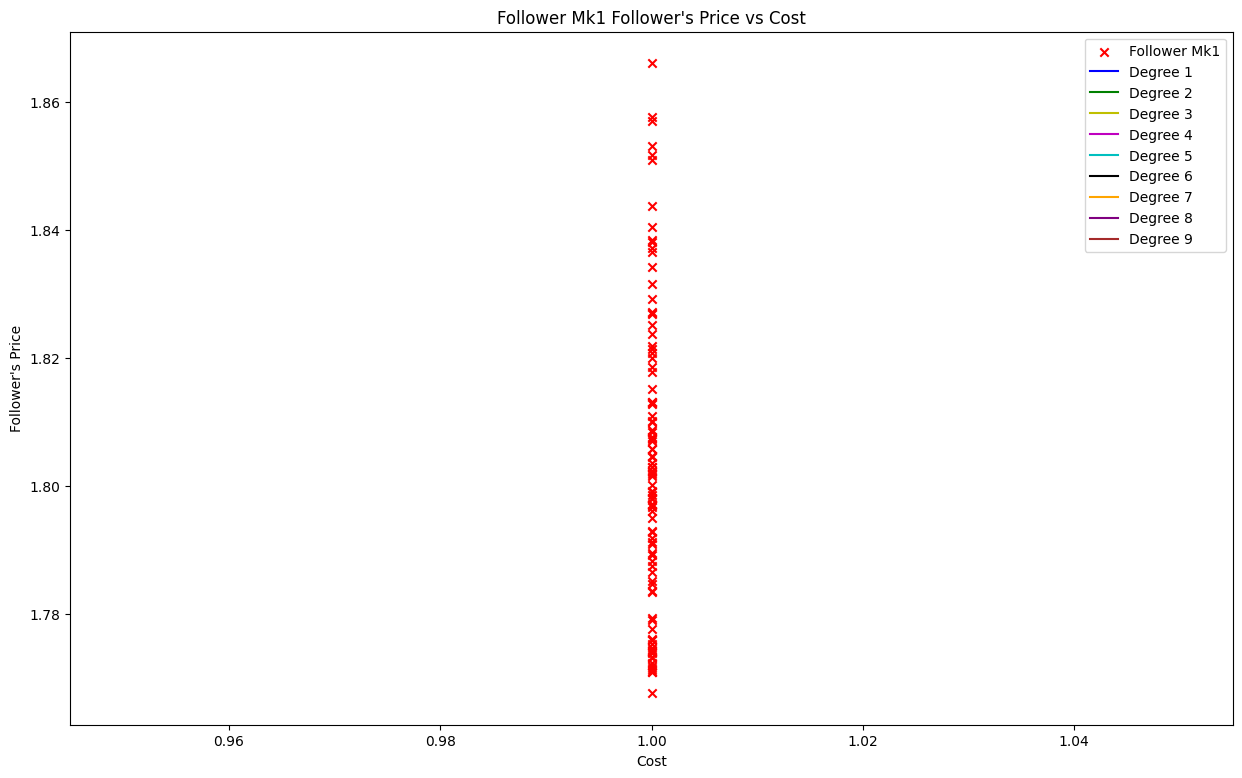

In [47]:
plt.clf()
plt.figure(figsize=(15, 9))

x = f1m["Cost"]
y = f1m["Follower's Price"]

plt.scatter(x, y, marker='x', color='r', label='Follower Mk1')

degrees = range(1, 10)
colours = ['b', 'g', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown']
for degree, colour in zip(degrees, colours):
    model = np.poly1d(np.polyfit(x, y, degree))
    x_fit = np.linspace(x.min(), x.max(), num=50)
    y_fit = model(x_fit)
    plt.plot(x_fit, y_fit, color=colour, label=f'Degree {degree}')

plt.xlabel("Cost")
plt.ylabel("Follower's Price")
plt.title("Follower Mk1 Follower's Price vs Cost")
plt.legend()

plt.show()